
# **Spatial Trend Analysis with Python**


Spatial trend analysis is a method used in various fields, including geography, geology, environmental science, and economics, to examine the spatial changes of a feature or phenomenon over time. In this method, spatial data and information (including geographic points, areas, or regions) are studied over different time periods to identify patterns and spatial variations in these data.

In [ ]:
# Install numpy, matplotlib, geopandas, rasterio libraries
!pip install numpy matplotlib geopandas rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.2 MB/s eta 0:00:00


In [ ]:
# Connect Colab and Google Drive for link data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


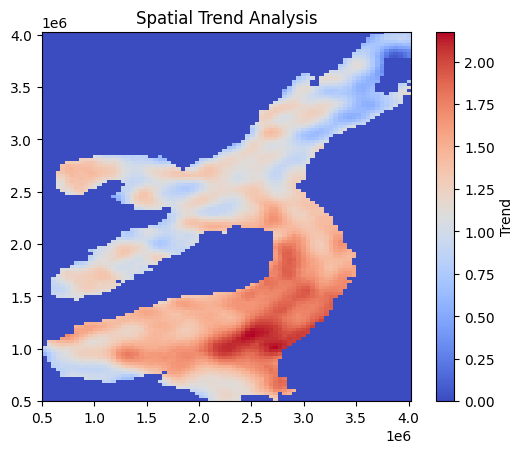

In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from numpy.polynomial import Polynomial

# Your rasters directory in drive
folder_path = '/content/drive/MyDrive/Rasters/'

# Read all rasters in folder
rasters = []
for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        raster_path = os.path.join(folder_path, filename)
        with rasterio.open(raster_path) as src:
            temperature_data = src.read(1)
            rasters.append(temperature_data)

rasters = np.array(rasters)

# Spatial Trend Analysis
spatial_trends = np.empty(rasters.shape[1:])
for i in range(rasters.shape[1]):
    for j in range(rasters.shape[2]):
        x = np.arange(rasters.shape[0])
        y = rasters[:, i, j]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        spatial_trends[i, j] = slope
        # p = Polynomial.fit(x, y, 2)  # Quadratic polynomial regression
        # spatial_trends[i, j] = p.convert().coef[0]  # Coeficient x^2

# Display figure of spatial trend on map
plt.imshow(spatial_trends, cmap='coolwarm', extent=src.bounds)
plt.colorbar(label='Trend')
plt.title('Spatial Trend Analysis')
plt.show()


**slope**: This value represents the slope of the linear regression line. In other words, it shows how much change in the dependent variable (temperature in this case) occurs for each unit of time.

**intercept**: This value is a measure of the point where the regression line intersects with the axis of the independent variable (in this case, the time axis).

**r_value**: This value represents the correlation coefficient between the data and the regression line. It has a value between -1 and 1, indicating the strength and direction of the relationship between the data and the regression line.

**p_value**: This value indicates the statistical significance of the regression. If the p-value is less than a specified threshold (usually 0.05), we can assume that the statistical relationship is significant.

**std_err** (Standard Error): This value indicates the standard error in the regression model. It shows how much the data deviates from the regression line.


In [ ]:
# Get output from result
from rasterio.transform import from_origin

# Assign name and directory for output
output_raster_path = 'exportTest.tif'

# The size of the new raster matrix is equal to the dimensions of "spatial_trends"
rows, cols = spatial_trends.shape

# Initial values for the spatial extent of the raster
x_min, y_max = (0, 0)  # Up left point's coordinate(x,y)
pixel_size = 1.0  # The pixel size in unit of coordinate

# Create a coordinate transform based on the initial values
transform = from_origin(x_min, y_max, pixel_size, pixel_size)

# Open raster for write result
with rasterio.open(output_raster_path, 'w', driver='GTiff', height=rows, width=cols, count=1, dtype=spatial_trends.dtype, crs='EPSG:4326', transform=transform) as dst:
    dst.write(spatial_trends, 1)  # Write matrix in first band

# When done successfully...
print("Raster saved successfully :)")

Raster saved successfully.


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
